<a href="https://colab.research.google.com/github/jamsyd/Gold-Prices/blob/main/GOLD_LINEAR_REGRESSION_MODEL_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2

import scipy.stats as stats


import statsmodels.api as sm

### Reading in the Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/GOLD/GDX_MODEL_DATA.csv')


In [ ]:
df.head()

,Unnamed: 0,Date,GDX,TLT,GLD,GLD_TLT,LBMA Gold Price,NAV per GLD in Gold,NAV/share at 10.30 a.m. NYT,Indicative Price of GLD at 4.15 p.m. NYT,Mid point of bid/ask spread at 4.15 p.m. NYT#,Premium/Discount of GLD mid point v Indicative Value of GLD at 4.15 p.m. NYT,Daily Share Volume,Total Net Asset Value Ounces in the Trust as at 4.15 p.m. NYT,Total Net Asset Value Tonnes in the Trust as at 4.15 p.m. NYT,Total Net Asset Value in the Trust,Real_Interest_Rates,Futures_Open_Interest,Futures_Com_Long,Futures_Com_Short,Futures_Non_Long,Futures_Non_Short,Futures_Non_Spread,Futures_Nrept_Long,Futures_Nrept_Short
0,0,6/6/2006 0:00,37.009998,85.080002,62.55,0.435002,627.00,99.39,62.32,62.57,62.56,0.0,7174800,11430662.03,355.53,7166425543,2.44,283161,51439,180808,134649,38753,48951,48122,14649
1,1,7/6/2006 0:00,36.139999,85.099998,62.28,0.424677,617.75,99.39,61.40,62.26,62.27,0.0,10171000,11430662.03,355.53,7060614541,2.48,283161,51439,180808,134649,38753,48951,48122,14649
2,2,8/6/2006 0:00,35.270000,85.269997,60.91,0.413627,614.00,99.39,61.02,60.93,60.90,0.0,14216500,11430662.03,355.53,7017672652,2.47,283161,51439,180808,134649,38753,48951,48122,14649
3,3,9/6/2006 0:00,35.070000,85.720001,60.45,0.409123,616.00,99.39,61.22,60.48,60.47,0.0,7414000,11430662.03,355.53,7040456820,2.45,283161,51439,180808,134649,38753,48951,48122,14649
4,4,12/6/2006 0:00,33.779999,85.790001,60.03,0.393752,609.20,99.38,60.54,60.10,60.02,0.0,4113300,11430662.03,355.53,6962497705,2.45,283161,51439,180808,134649,38753,48951,48122,14649


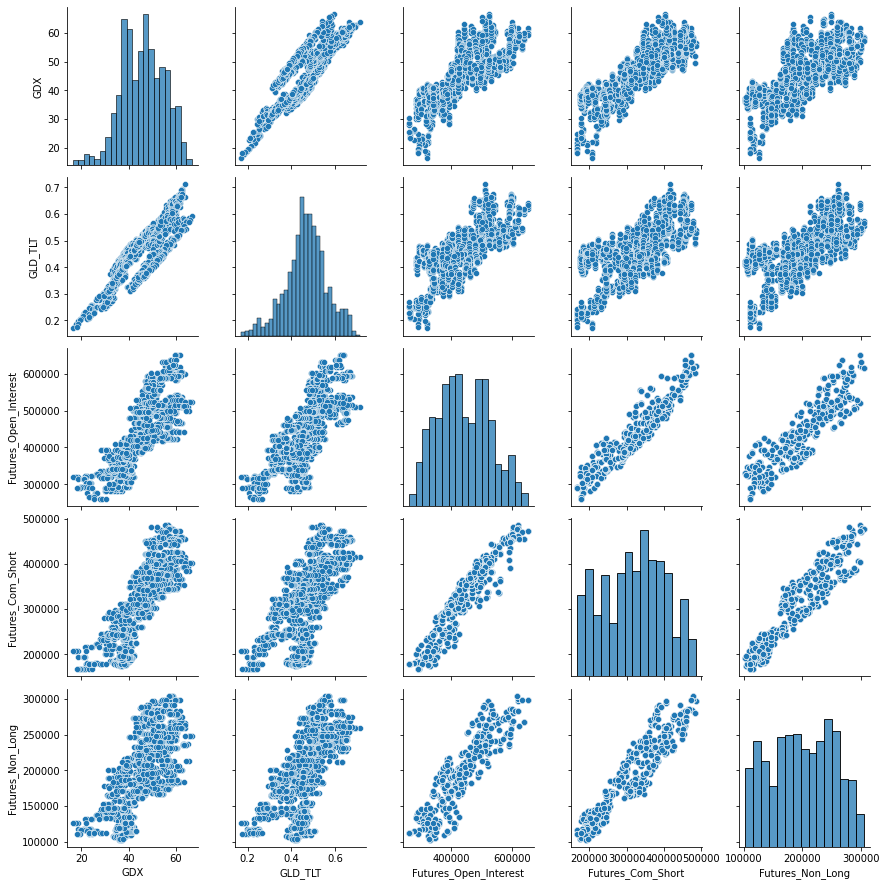

In [14]:
# Real interest rates not working
sns.pairplot(df[['GDX','GLD_TLT','Futures_Open_Interest','Futures_Com_Short','Futures_Non_Long']])

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [18]:
y=df['GDX']

In [22]:
X=df[['GLD_TLT','Futures_Open_Interest','Futures_Com_Short','Futures_Non_Long']]

In [23]:
lm.fit(X,y)

LinearRegression()

In [24]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 6.50246598e+01 -5.01156343e-05  1.49930701e-04 -9.75152317e-05]


In [25]:
predictions = lm.predict( X)


Text(0, 0.5, 'Predicted Y')

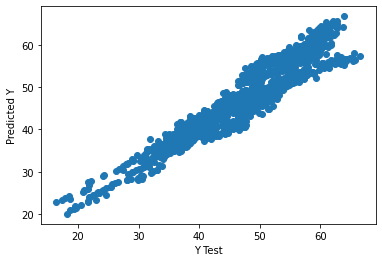

In [26]:
plt.scatter(y,predictions)
plt.xlabel('Y Test')
zplt.ylabel('Predicted Y')

In [28]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

MAE: 2.2340064234337467
MSE: 7.8838242674896195
RMSE: 2.807814856341069


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


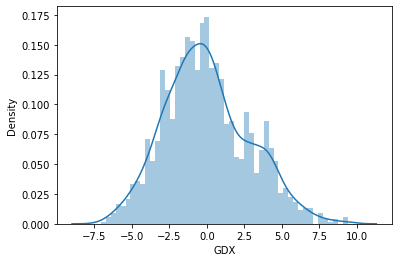

In [29]:
sns.distplot((y-predictions),bins=50);

In [30]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
GLD_TLT,65.024660
Futures_Open_Interest,-0.000050
Futures_Com_Short,0.000150
Futures_Non_Long,-0.000098


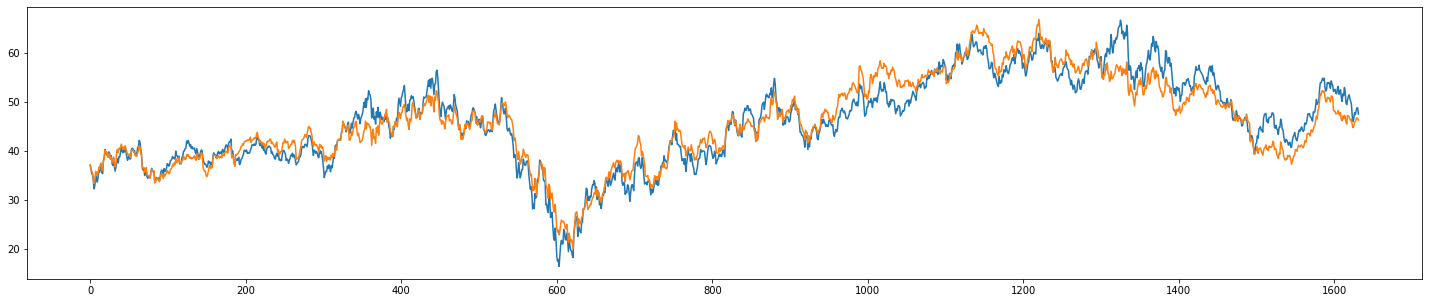

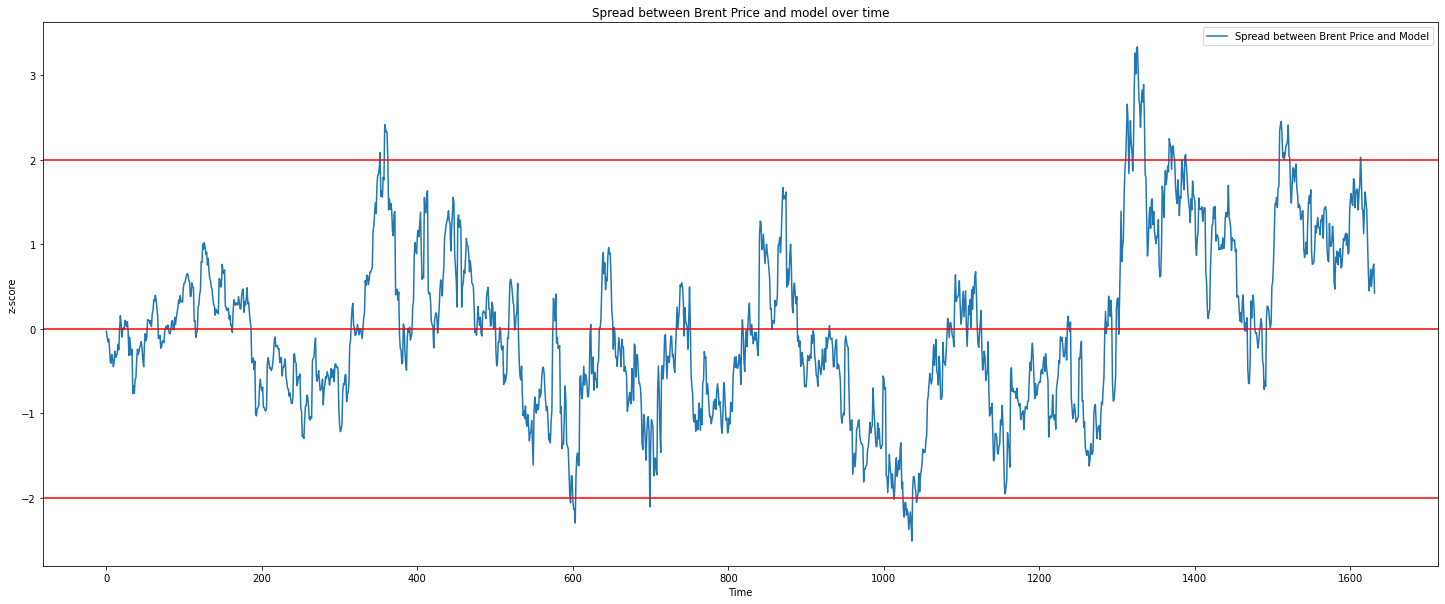

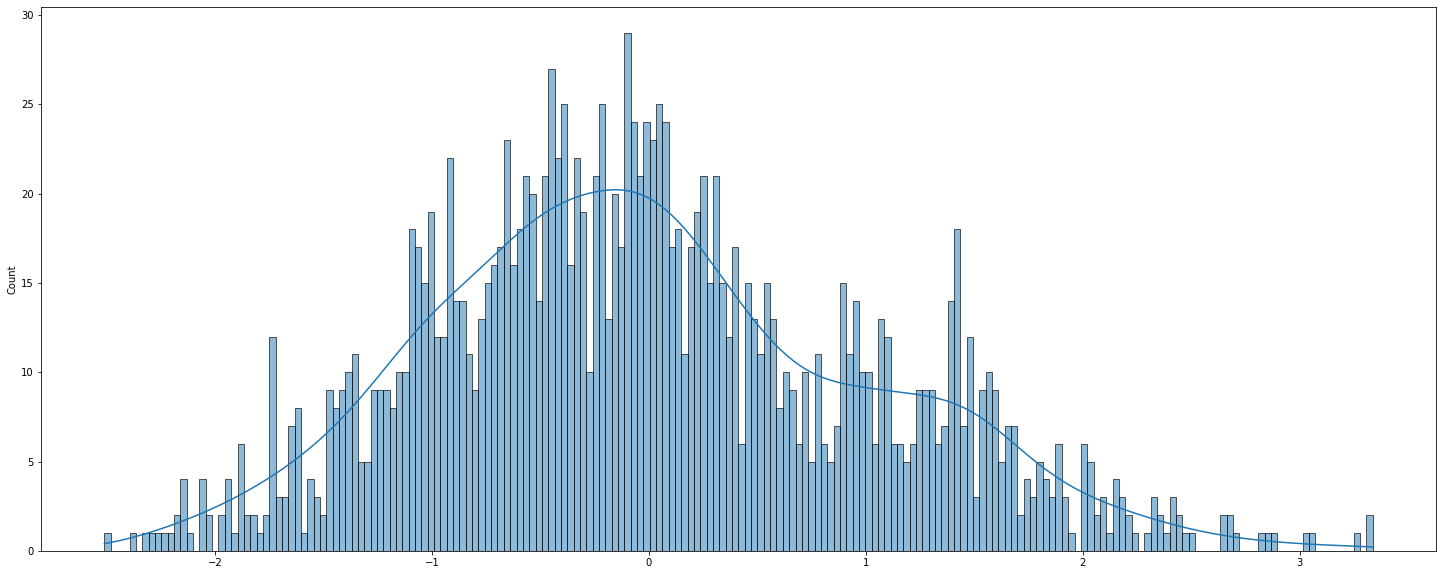

In [80]:
plt.figure(figsize=(25, 5))

plt.plot(df['GDX'])
plt.plot(predictions)

plt.figure(figsize=(25, 10))

plt.plot(stats.zscore(y-predictions))
plt.axhline(y=0,color='red')
plt.axhline(y=2,color='red')
plt.axhline(y=-2,color='red')

plt.legend(['Spread between Brent Price and Model'])
plt.ylabel("z-score")
plt.xlabel("Time")
plt.title("Spread between Brent Price and model over time")

plt.show()

plt.figure(figsize=(25, 10))

sns.histplot(stats.zscore(y-predictions),bins=200,kde=True)


In [39]:
model = sm.OLS(y, X)
GDX_model = model.fit()

print(GDX_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    GDX   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          8.777e+04
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                        0.00
Time:                        20:37:47   Log-Likelihood:                         -4199.9
No. Observations:                1632   AIC:                                      8408.
Df Residuals:                    1628   BIC:                                      8429.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

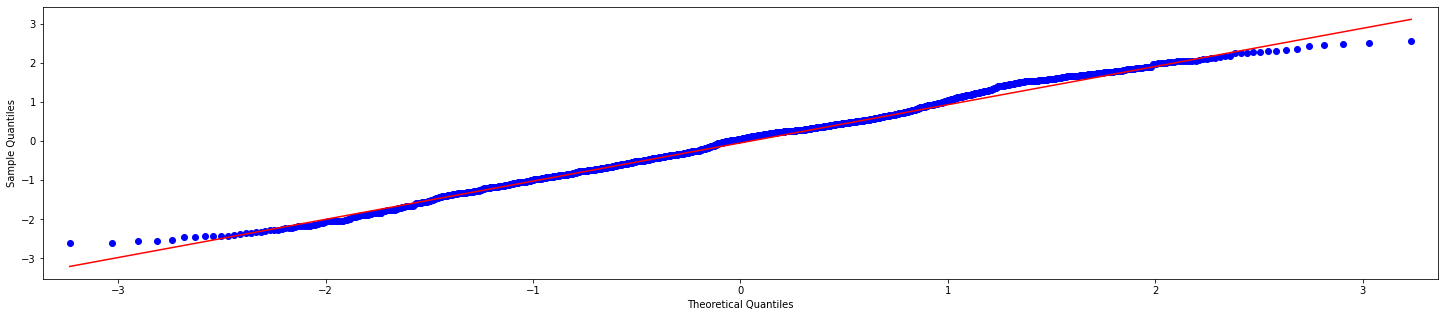

In [43]:
resid = GDX_model.resid

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

fig = sm.qqplot(resid, line='q', ax=ax, fit=True)

In [48]:
test = sms.omni_normtest(GDX_model.resid)

print("Chi^2",test[0])
print("p-value: ",test[1])

Chi^2 9.063356244223073
p-value:  0.010762599953058175


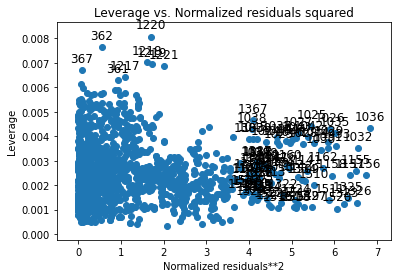

In [63]:

fig = figsize=(25, 25)
fig = plot_leverage_resid2(GDX_model)